<h1 align='center'> 
<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" />
</h1>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2022 </h1>

<H3 align='center'> Taller 3 - Redes Neuronales y Deep Learning </H3>
<hr style="height:2px;border:none"/>


# Integrantes
- Rodrigo Cayazaya

- Francisco Reyes

- María Riveros

# Temas  

* Métodos no supervisados y semi-supervisados.

# Reglas & Formalidades

* Se deben formar equipos de 3 personas. En caso de problemas para formar equipos contacten a sus profesores y ayudantes.  
* En caso de modificaciones, los equipos deben ser re-inscritos antes del 30 de mayo usando el link enviado para la entrega anterior.
* Se debe respetar el Código de Honor del curso y del DI (Syllabus). Pueden reusar código visto en clases y/o recolectar código/ideas de otros sitios o papers, mencionando al autor y entregando un link a la fuente. 
* Si resultara necesaria la intervención de personas ajenas al grupo (e.g. experto) debe ser declarada y justificada.
* Tener roles dentro del equipo está muy bien, pero al final del proceso, cada miembro debe entender y estar en condiciones de exponer todo el trabajo realizado. 

# Entregables 


> * **Video:** Se debe preparar un video explicativo de **máximo 20 minutos** donde se describe la metodología utilizada, los resultados obtenidos y las conclusiones de la experiencia. 

> * **Código:** Se debe enviar un jupyter notebook con el código utilizado, de modo que sea posible **reproducir los resultados** presentados. Como alternativa, se puede entregar un link Github con el código fuente, incluyendo instrucciones precisas para ejecutar los experimentos. En cualquier caso (notebook o repo) el código debe estar ordenado y seccionado apropiadamente.

> * **Conformidad Ética:** Se debe incluir una breve declaración ética en que se indique que el trabajo que se está enviando es un trabajo original, desarollado por los autores en conformidad con todas reglas antes mencionadas. Se debe también mencionar brevemente cuál fue la contribución de cada miembro del equipo. La declaración puede ser parte del notebook o estar en un archivo dentro del repo.

> * **Defensa en vivo + video-conferencia:** Personas que deben asistir presencialmente el día de clases agendado para la discusión del taller serán sorteadas. Ese día se seleccionarán aleatoriamente algunos equipos que presentarán oralmente su trabajo ante el curso. Los autores serán evaluados considerando la discusión y debate que generen entre sus pares. Los puntos obtenidos (positivos o negativos) se sumarán a la nota final de taller.



# Fechas

> * Defensas: 22 de Julio, horario de clases.
> * Fecha de entrega de vídeo: 23 de Julio 23:00 Hrs.
> * Fecha de entrega de Jupyter (notebook): debe haber un borrador completo (o casi) el 21 de Julio, pero se puede modificar la entrega hasta el 23 de Julio 23:00 Hrs.


# Conformidad Ética
En esta evaluación no hubo copia de ninguna clase en la realización de esta tarea. Además, a lo largo de la realización del trabajo se hizo en equipo.

# Video

https://drive.google.com/drive/folders/1SFRQN4KCXbAz9DyWVkfJhShAdWf4NG22?usp=sharing

# Desafío Kaggle




<table align='left'>
<tr>
<td><img src='https://storage.googleapis.com/kaggle-competitions/kaggle/37523/logos/header.png?t=2022-06-29-18-54-29' width='600'/> </td>
</tr>
</table>


Para esta competencia se debe construir un sistema que permita recuperar imágenes por contenido: dada una imagen de referencia q (query), debe encontrar las imágenes de una base de datos que son semánticamente similares a q.

Este problema se conoce en la literatura como CBIR y tiene varias aplicaciones. Una de ellas consiste en recuperar imágenes médicas similares a las que se acaba de tomar un paciente para apoyar el diagnóstico de un especialista. Esta idea siendo explorada por investigadores UTFSM en un Proyecto FONDEF denominado "Proximity".

Para simular condiciones del mundo real, se pone a disposición de los competidores una base de datos donde sólo una pequeña parte de las imágenes tiene anotaciones de alto nivel que permitan guiar el entrenamiento. Se espera que los competidores implementen mecanismos de aprendizaje no-supervisado para compensar esta limitación.

Más detalles en: https://www.kaggle.com/t/e31a24cb80a949d38aca9c840ce8a56d



## Imports

In [ ]:
#keras
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import mnist
from keras.models import load_model

#tensorflow
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import EfficientNetB0

#sklearn
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#scipy
from scipy.spatial import distance as scipydistance

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

## Visualización de data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
descriptions = pd.read_csv('/content/descriptions.csv')
descriptions

,ID,description
0,image5876.jpg,a man in a white shirt is playing the flute t...
1,image1656.jpg,surfer does trick in wave as seen from behind
2,image8620.jpg,a child wearing a pink shirt is jumping into ...
3,image28501.jpg,the mastif playfully pins the german shepherd...
4,image24347.jpg,there are two large dogs running about in a f...
...,...,...
995,image7695.jpg,barefoot boys play soccer in front of an afri...
996,image11472.jpg,a child with a mask on sitting at a table wit...
997,image7568.jpg,older man with a striped shirt is waiting for...
998,image13582.jpg,a man in a red shirt in the doorway of a laun...


In [ ]:
example_submission = pd.read_csv('/content/example_submission_for_kaggle.csv')
example_submission

,Id,Expected
0,17518,4682 23538 29644 7767 12521 29084 20780 12121...
1,423,13487 15583 3195 7497 17990 17321 10177 7121 ...
2,13103,10578 19364 29710 28912 27833 24252 11927 219...
3,16040,31493 18044 15308 9880 5558 6552 8166 11812
4,25535,25440 25165 4759 26060 27036 28781 11189 1042...
...,...,...
856,30184,23238 17378 7370 27318 26434
857,19158,18885 28538 13156 31736 7088 13190 15039 1900...
858,28255,16362 16758 22452 4798 16152 31336
859,23583,4103 17471 7964 13491 28728 29010 7847 25662 ...


In [ ]:
df = pd.read_csv('/content/examples_of_retrieval.csv', header=None, sep='\n')
example_retrieval = pd.DataFrame()
for col in df.columns:
  for i in range(100):
    df[col][i] = df[col][i].replace(' ','')
    imgs = df[col][i].split(',')
    dic = {}
    for j in range(len(imgs)):
      dic[j] = imgs[j]
    example_retrieval = example_retrieval.append(dic, ignore_index = True)
example_retrieval

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,image5876.jpg,image8247.jpg,image4311.jpg,image21636.jpg,image29364.jpg,image29600.jpg,image6074.jpg,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,image1656.jpg,image8378.jpg,image30164.jpg,image10347.jpg,image30084.jpg,image27316.jpg,image11753.jpg,image12334.jpg,image26836.jpg,image24439.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,image8620.jpg,image17004.jpg,image2055.jpg,image17607.jpg,image9247.jpg,image11535.jpg,image5077.jpg,image8909.jpg,image2024.jpg,image21152.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,image28501.jpg,image4752.jpg,image13560.jpg,image15309.jpg,image22465.jpg,image23565.jpg,image9603.jpg,image24480.jpg,image29469.jpg,image11583.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,image24347.jpg,image17052.jpg,image28092.jpg,image25594.jpg,image27718.jpg,image17641.jpg,image10277.jpg,image8766.jpg,image22352.jpg,image15665.jpg,...,image19749.jpg,image6339.jpg,image21123.jpg,image14787.jpg,image6234.jpg,image17237.jpg,image18427.jpg,image11097.jpg,image29205.jpg,image13962.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,image4810.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,image1648.jpg,image30101.jpg,image20332.jpg,image27076.jpg,image23565.jpg,image1493.jpg,image15534.jpg,image16226.jpg,image21493.jpg,image25649.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,image16784.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,image15281.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_querys = pd.read_csv('/content/names_test_queries.csv', header=None)
test_querys

,0
0,image17518.jpg
1,image423.jpg
2,image13103.jpg
3,image16040.jpg
4,image25535.jpg
...,...
856,image30184.jpg
857,image19158.jpg
858,image28255.jpg
859,image23583.jpg


### Creando carpeta Test

In [ ]:
!mkdir /content/drive/MyDrive/Data_Taller_3/database-full/test

In [ ]:
for col in test_querys.columns:
  for img in test_querys[col]:
    ruta_img = "/content/drive/MyDrive/Data_Taller_3/database-full/database-full/" + "\'" + img + "\'"
    ruta_test = "/content/drive/MyDrive/Data_Taller_3/database-full/test/" + "\'" + img + "\'"
    !cp {ruta_img} {ruta_test}
    !rm {ruta_img}    

In [ ]:
!rm /content/drive/MyDrive/Data_Taller_3/database-full/database-full/' image11396.jpg'

In [ ]:
!find /content/drive/MyDrive/Data_Taller_3/database-full/test -maxdepth 1 -type f | wc -l 

861


In [ ]:
!find /content/drive/MyDrive/Data_Taller_3/database-full/database-full -maxdepth 1 -type f | wc -l 

30922


In [ ]:
trainDir = '/content/drive/MyDrive/Data_Taller_3/database-full/database-full'
testDir = '/content/drive/MyDrive/Data_Taller_3/database-full/test'
modelDir = '/content/drive/MyDrive/Data_Taller_3/database-full/modelos'
distDir = '/content/drive/MyDrive/Data_Taller_3/database-full/distancias'

In [ ]:
trainDirList = os.listdir(trainDir)

In [ ]:
testDirList = os.listdir(testDir)

In [ ]:
l1 = []
for i in range(len(trainDirList)):
  l1.append(trainDirList[i])
dic = {'name': l1}
train = pd.DataFrame(dic)

In [ ]:
train

,name
0,image31272.jpg
1,image22531.jpg
2,image26718.jpg
3,image2318.jpg
4,image14263.jpg
...,...
30917,image8474.jpg
30918,image3409.jpg
30919,image22472.jpg
30920,image31551.jpg


In [ ]:
l2 = []
for i in range(1,len(testDirList)):
  l2.append(testDirList[i])
dic = {'name': l2}
test = pd.DataFrame(dic)

In [ ]:
test

,name
0,image16040.jpg
1,image25535.jpg
2,image22392.jpg
3,image24783.jpg
4,image5004.jpg
...,...
856,image18683.jpg
857,image17518.jpg
858,image423.jpg
859,image13103.jpg


## Pipeline 0: Creación de descripciones

In [ ]:
!pip install git+https://github.com/LIAAD/yake

In [ ]:
import yake
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 1
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
cols = []
for i in range(1000):
  col = []
  text = descriptions[' description'][i]
  keywords = custom_kw_extractor.extract_keywords(text)
  for kw in keywords:
    col.append(kw[0])
  cols.append(col)

In [ ]:
todos = []
i = 0
for col in cols:
  i += 1
  for valor in col:
    todos.append(valor)
conjunto = set(todos)
len(conjunto)

1982

In [ ]:
dic = {}
for con in conjunto:
  res = []
  for i in range(1000):
    text = descriptions[' description'][i]
    if(con in text):
      res.append(1)
    else:
      res.append(0)
  dic[con] = res

In [ ]:
df = pd.DataFrame(data=dic)
result = pd.concat([descriptions, df], axis=1)
result = result.drop(' description', axis=1)
result

,ID,cricket,performing,girl,nose,drying,headset,pit,setting,parachute,...,origin,cover,saxaphone,raised,tattoo,venue,aged,palestine,pulling,carrier
0,image5876.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,image1656.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,image8620.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,image28501.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,image24347.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,image7695.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,image11472.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,image7568.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,image13582.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Pipeline 1: Autoencoder desde 0

### Carga de imágenes

In [ ]:
BATCH_SIZE = 64
train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2)

train_generator = train_datagen.flow_from_dataframe(
        train,
        directory=trainDir,
        x_col = 'name',
        target_size=(128, 128),
        batch_size=BATCH_SIZE,
        shuffle=False, #no poner True
        class_mode="input")

test_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2)

test_generator = test_datagen.flow_from_dataframe(
        test,
        directory=testDir,
        x_col = 'name',
        target_size=(128, 128),
        batch_size=1,
        shuffle=False,
        class_mode=None)

Found 30922 validated image filenames.
Found 861 validated image filenames.


### Creación y entrenamiento del modelo

In [ ]:
def train_model(train_generator):
    input_img = Input(shape=(128, 128, 3))  # adapt this if using `channels_first` image data format
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same', name='encoder')(x)

    # at this point the representation is (4, 4, 8) i.e. 128-dimensional

    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    autoencoder.summary()

    autoencoder.fit_generator(generator=train_generator,
                    steps_per_epoch=100,
                    verbose = 1,
                    epochs=8)
    
    #intentamos con steps_per_epoch = 300 y colab me tiró en la epoch 3

    autoencoder.save('simple2.h5')

train_model(train_generator)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/8
100/100 [==============================] - 4925s 49s/step - loss: 0.0470
Epoch 2/8
100/100 [==============================] - 4000s 40s/step - loss: 0.0209
Epoch 3/8
100/100 [==============================] - 3217s 32s/step - loss: 0.0173
Epoch 4/8
100/100 [==============================] - 2688s 27s/step - loss: 0.0162
Epoch 5/8
100/100 [==============================] - 2252s 22s/step - loss: 0.0154
Epoch 6/8
100/100 [==============================] - 1561s 16s/step - loss: 0.0148
Epoch 7/8
100/100 [==============================] - 1412s 14s/step - loss: 0.0148
Epoch 8/8
100/100 [==============================] - 863s 8s/step - loss: 0.0141


In [ ]:
#cargar modelo descargado
modelo_simple = modelDir + '/simple2.h5'
autoencoder2 = keras.models.load_model(modelo_simple)

In [ ]:
!mkdir /content/dist

### Calcular distancias euclideanas

In [ ]:
def compute_average_precision_score(test_codes, learned_codes):
    #For each query image feature we compute the closest images from training dataset
    for i in range(len(test_codes)):
        distances = []
        # Compute the euclidian distance for each feature from training dataset
        for code in learned_codes:
            distance = np.linalg.norm(code - test_codes[i])
            distances.append(distance)
        
        # Store the computed distances and corresponding labels from training dataset
        distances = np.array(distances)
        #print(distances)
        name = '/content/dist/distancias'+str(i)+'.npy'
        np.save(name, distances)

In [ ]:
# Get encoder layer from trained model
encoder = Model(inputs=autoencoder2.input, outputs=autoencoder2.get_layer('encoder').output)

# Compute features for training dataset
learned_codes = encoder.predict(train_generator,batch_size=64,verbose=1,workers=4)

# Compute features for query images
test_codes = encoder.predict(test_generator)


484/484 [==============================] - 1378s 3s/step


In [ ]:
# Compute distance
compute_average_precision_score(test_codes, learned_codes)

### MAP@100

In [ ]:
ruta = distDir + '/dist2'
dic_pred = {}
for i in range(861):
  rutaArray = ruta + '/distancias'+str(i)+'.npy'
  dis = np.load(rutaArray)
  dic = {}
  for k in range(len(dis)):
    dic[k] = dis[k]
  l_sorted = sorted(dic.items(), key=lambda item: item[1])
  img_pred = []
  for j in range(len(l_sorted)):
    lugar = l_sorted[j][0]
    distancia = int(l_sorted[j][1])
    img_train = train.iloc[lugar]['name']
    if(len(img_pred) < 100):
      img_pred.append(img_train)
    else:
      break
  dic_pred[test.iloc[i]['name']] = img_pred
print(dic_pred)

#### Submit 1.1

In [ ]:
l_id_img = []
l_id_img_pred = []
for k,v in dic_pred.items():
  id_img = k.split(".")[0].split("image")[1]
  id_img_pred = ""
  for val in v:
    id_img_pred = id_img_pred + val.split(".")[0].split("image")[1] + " "
  id_img_pred = id_img_pred[0:-1]
  l_id_img.append(id_img)
  l_id_img_pred.append(id_img_pred)

In [ ]:
d = {'Id': l_id_img, 'Expected': l_id_img_pred}
submit1 = pd.DataFrame(data=d)
submit1

,Id,Expected
0,13103,21674 24243 1836 27618 21756 24826 10309 17380...
1,16040,4417 6292 6612 386 25955 23200 10460 11557 375...
2,25535,31246 11350 22652 26962 16618 13919 4680 13265...
3,8581,30295 2691 9728 31409 70 30450 31265 8265 1372...
4,22392,3082 13265 1950 9559 9728 510 12070 2959 11548...
...,...,...
856,28255,6028 30315 2937 5302 26913 5968 8273 12953 190...
857,23583,20635 22837 29712 15074 2823 3812 20974 29366 ...
858,18683,18261 31118 7370 23877 4430 16221 6048 22729 2...
859,17518,6154 2691 2311 18252 20931 22157 31029 13265 1...


In [ ]:
submit1.to_csv('submit1.csv', index=False)

In [ ]:
s1 = pd.read_csv('/content/submit1.csv')
s1

,Id,Expected
0,13103,21674 24243 1836 27618 21756 24826 10309 17380...
1,16040,4417 6292 6612 386 25955 23200 10460 11557 375...
2,25535,31246 11350 22652 26962 16618 13919 4680 13265...
3,8581,30295 2691 9728 31409 70 30450 31265 8265 1372...
4,22392,3082 13265 1950 9559 9728 510 12070 2959 11548...
...,...,...
856,28255,6028 30315 2937 5302 26913 5968 8273 12953 190...
857,23583,20635 22837 29712 15074 2823 3812 20974 29366 ...
858,18683,18261 31118 7370 23877 4430 16221 6048 22729 2...
859,17518,6154 2691 2311 18252 20931 22157 31029 13265 1...


**Score = 0.00011**

### MAP@50

In [ ]:
ruta = distDir + '/dist2'
dic_pred = {}
for i in range(861):
  rutaArray = ruta + '/distancias'+str(i)+'.npy'
  dis = np.load(rutaArray)
  dic = {}
  for k in range(len(dis)):
    dic[k] = dis[k]
  l_sorted = sorted(dic.items(), key=lambda item: item[1])
  img_pred = []
  for j in range(len(l_sorted)):
    lugar = l_sorted[j][0]
    distancia = int(l_sorted[j][1])
    img_train = train.iloc[lugar]['name']
    if(len(img_pred) < 50):
      img_pred.append(img_train)
    else:
      break
  dic_pred[test.iloc[i]['name']] = img_pred
print(dic_pred)

#### Submit 1.2

In [ ]:
l_id_img = []
l_id_img_pred = []
for k,v in dic_pred.items():
  id_img = k.split(".")[0].split("image")[1]
  id_img_pred = ""
  for val in v:
    id_img_pred = id_img_pred + val.split(".")[0].split("image")[1] + " "
  id_img_pred = id_img_pred[0:-1]
  l_id_img.append(id_img)
  l_id_img_pred.append(id_img_pred)

In [ ]:
d = {'Id': l_id_img, 'Expected': l_id_img_pred}
submit12 = pd.DataFrame(data=d)
submit12

,Id,Expected
0,13103,21674 24243 1836 27618 21756 24826 10309 17380...
1,16040,4417 6292 6612 386 25955 23200 10460 11557 375...
2,25535,31246 11350 22652 26962 16618 13919 4680 13265...
3,8581,30295 2691 9728 31409 70 30450 31265 8265 1372...
4,22392,3082 13265 1950 9559 9728 510 12070 2959 11548...
...,...,...
856,28255,6028 30315 2937 5302 26913 5968 8273 12953 190...
857,23583,20635 22837 29712 15074 2823 3812 20974 29366 ...
858,18683,18261 31118 7370 23877 4430 16221 6048 22729 2...
859,17518,6154 2691 2311 18252 20931 22157 31029 13265 1...


In [ ]:
submit12.to_csv('submit1.2.csv', index=False)

In [ ]:
s12 = pd.read_csv('/content/submit1.2.csv')
s12

,Id,Expected
0,13103,21674 24243 1836 27618 21756 24826 10309 17380...
1,16040,4417 6292 6612 386 25955 23200 10460 11557 375...
2,25535,31246 11350 22652 26962 16618 13919 4680 13265...
3,8581,30295 2691 9728 31409 70 30450 31265 8265 1372...
4,22392,3082 13265 1950 9559 9728 510 12070 2959 11548...
...,...,...
856,28255,6028 30315 2937 5302 26913 5968 8273 12953 190...
857,23583,20635 22837 29712 15074 2823 3812 20974 29366 ...
858,18683,18261 31118 7370 23877 4430 16221 6048 22729 2...
859,17518,6154 2691 2311 18252 20931 22157 31029 13265 1...


**Score = 0.00008**

![picture](https://drive.google.com/uc?export=view&id=1-rAyTgkxfeoELsOfbGH22VnGi_FrEZ4I)

![picture](https://drive.google.com/uc?export=view&id=140Lzzp7iqiDgVvq3Apt8iNLht8BAp7yv)
![picture](https://drive.google.com/uc?export=view&id=1IkjEYAU1ZP3VjL6ze8YFFR-IBFzOoL-j)


---

![picture](https://drive.google.com/uc?export=view&id=1-lbg8H6ExiLx2i2rnpZi8kZa_6oxiyv_)

![picture](https://drive.google.com/uc?export=view&id=14v0gs-RgbbwrK7ZIHLc-UvkUyTTflRZE)
![picture](https://drive.google.com/uc?export=view&id=1IegEpcNAeX5nkWTodfH3Ykz686GYYqqO)

## Pipeline 2: Preentrenada

### Carga de imágenes

In [ ]:
BATCH_SIZE = 64
train_datagen = keras.preprocessing.image.ImageDataGenerator()

train_generator = train_datagen.flow_from_dataframe(
        train,
        directory=trainDir,
        x_col = 'name',
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        shuffle=False, #no poner True
        class_mode="input")

test_datagen = keras.preprocessing.image.ImageDataGenerator()

test_generator = test_datagen.flow_from_dataframe(
        test,
        directory=testDir,
        x_col = 'name',
        target_size=(224, 224),
        batch_size=1,
        shuffle=False,
        class_mode=None)

Found 30922 validated image filenames.
Found 861 validated image filenames.


### Creación y entrenamiento del modelo

In [ ]:
inputs = layers.Input(shape=(224, 224, 3))

model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet", input_shape=(224, 224, 3))

# Freeze the pretrained weights
model.trainable = False

model = keras.Model(inputs=model.inputs, outputs = model.layers[74].output)
x = model.output
encoded = MaxPooling2D((2, 2), padding='same', name='encoder')(x)
model = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
model = UpSampling2D((2, 2))(model)
model = Conv2D(8, (3, 3), activation='relu', padding='same')(model)
model = UpSampling2D((2, 2))(model)
model = Conv2D(16, (3, 3), activation='relu', padding='same')(model)
model = UpSampling2D((2, 2))(model)
model = Conv2D(16, (3, 3), activation='relu', padding='same')(model)
model = UpSampling2D((2, 2))(model)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(model)

# Compile
autoencoder = tf.keras.Model(inputs, decoded, name="EfficientNet")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
autoencoder.compile(optimizer=optimizer, loss="mse", metrics=["accuracy"])
autoencoder.summary()


In [ ]:
autoencoder.fit_generator(generator=train_generator,
                    steps_per_epoch=10,
                    verbose = 1,
                    epochs=3)
    
autoencoder.save('fran1.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/3
10/10 [==============================] - 479s 48s/step - loss: 16735.8477 - accuracy: 0.2571
Epoch 2/3
10/10 [==============================] - 478s 48s/step - loss: 16583.2578 - accuracy: 0.4813
Epoch 3/3
10/10 [==============================] - 378s 36s/step - loss: 16579.6348 - accuracy: 0.5251


In [ ]:
modelo = modelDir + '/fran1.h5'
autoencoder = keras.models.load_model(modelo)

In [ ]:
!mkdir /content/dist

### Calcular distancias euclideanas

In [ ]:
def compute_average_precision_score(test_codes, learned_codes):
    #For each query image feature we compute the closest images from training dataset
    for i in range(len(test_codes)):
        distances = []
        # Compute the euclidian distance for each feature from training dataset
        for code in learned_codes:
            distance = np.linalg.norm(code - test_codes[i])
            distances.append(distance)
        
        # Store the computed distances and corresponding labels from training dataset
        distances = np.array(distances)
        #print(distances)
        name = '/content/dist/distancias'+str(i)+'.npy'
        np.save(name, distances)

In [ ]:
# Get encoder layer from trained model
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)

# Compute features for training dataset
learned_codes = encoder.predict(train_generator,batch_size=64,verbose=1,workers=4)

# Compute features for query images
test_codes = encoder.predict(test_generator)


In [ ]:
# Compute distance
compute_average_precision_score(test_codes, learned_codes)

### MAP@100

In [ ]:
ruta = distDir + '/dist_fran'
dic_pred = {}
for i in range(861):
  rutaArray = ruta + '/distancias'+str(i)+'.npy'
  dis = np.load(rutaArray)
  dic = {}
  for k in range(len(dis)):
    dic[k] = dis[k]
  l_sorted = sorted(dic.items(), key=lambda item: item[1])
  img_pred = []
  for j in range(len(l_sorted)):
    lugar = l_sorted[j][0]
    distancia = int(l_sorted[j][1])
    img_train = train.iloc[lugar]['name']
    if(len(img_pred) < 100):
      img_pred.append(img_train)
    else:
      break
  dic_pred[test.iloc[i]['name']] = img_pred
print(dic_pred)

#### Submit 2.1

In [ ]:
l_id_img = []
l_id_img_pred = []
for k,v in dic_pred.items():
  id_img = k.split(".")[0].split("image")[1]
  id_img_pred = ""
  for val in v:
    id_img_pred = id_img_pred + val.split(".")[0].split("image")[1] + " "
  id_img_pred = id_img_pred[0:-1]
  l_id_img.append(id_img)
  l_id_img_pred.append(id_img_pred)

In [ ]:
d = {'Id': l_id_img, 'Expected': l_id_img_pred}
submit2 = pd.DataFrame(data=d)
submit2

In [ ]:
submit2.to_csv('submit2.csv', index=False)

In [ ]:
s2 = pd.read_csv('/content/submit2.csv')
s2

,Id,Expected
0,13103,21310 2334 22352 28164 18039 10424 19885 28527...
1,16040,3881 21829 7913 31442 30452 19750 25727 1749 5...
2,25535,18252 30690 8745 31773 7551 25917 12713 22797 ...
3,8581,7126 22729 25497 27618 31455 22528 17359 21049...
4,22392,20182 29740 24878 20635 10905 28121 31455 2407...
...,...,...
856,28255,22729 11077 13962 19299 31455 11419 18246 946 ...
857,23583,7126 3535 31455 30006 29497 19885 7287 11273 4...
858,18683,9731 5818 17244 4172 15764 25609 6028 28278 99...
859,17518,28121 21377 1749 30331 25201 15193 13005 31522...


**Score = 0.00265**

### MAP@50

In [ ]:
ruta = distDir + '/dist_fran'
dic_pred = {}
for i in range(861):
  rutaArray = ruta + '/distancias'+str(i)+'.npy'
  dis = np.load(rutaArray)
  dic = {}
  for k in range(len(dis)):
    dic[k] = dis[k]
  l_sorted = sorted(dic.items(), key=lambda item: item[1])
  img_pred = []
  for j in range(len(l_sorted)):
    lugar = l_sorted[j][0]
    distancia = int(l_sorted[j][1])
    img_train = train.iloc[lugar]['name']
    if(len(img_pred) < 50):
      img_pred.append(img_train)
    else:
      break
  dic_pred[test.iloc[i]['name']] = img_pred
print(dic_pred)

#### Submit 2.2

In [ ]:
l_id_img = []
l_id_img_pred = []
for k,v in dic_pred.items():
  id_img = k.split(".")[0].split("image")[1]
  id_img_pred = ""
  for val in v:
    id_img_pred = id_img_pred + val.split(".")[0].split("image")[1] + " "
  id_img_pred = id_img_pred[0:-1]
  l_id_img.append(id_img)
  l_id_img_pred.append(id_img_pred)

In [ ]:
d = {'Id': l_id_img, 'Expected': l_id_img_pred}
submit2 = pd.DataFrame(data=d)
submit2

,Id,Expected
0,13103,21310 2334 22352 28164 18039 10424 19885 28527...
1,16040,3881 21829 7913 31442 30452 19750 25727 1749 5...
2,25535,18252 30690 8745 31773 7551 25917 12713 22797 ...
3,8581,7126 22729 25497 27618 31455 22528 17359 21049...
4,22392,20182 29740 24878 20635 10905 28121 31455 2407...
...,...,...
856,28255,22729 11077 13962 19299 31455 11419 18246 946 ...
857,23583,7126 3535 31455 30006 29497 19885 7287 11273 4...
858,18683,9731 5818 17244 4172 15764 25609 6028 28278 99...
859,17518,28121 21377 1749 30331 25201 15193 13005 31522...


In [ ]:
submit2.to_csv('submit2.csv', index=False)

In [ ]:
s2 = pd.read_csv('/content/submit2.csv')
s2

,Id,Expected
0,13103,21310 2334 22352 28164 18039 10424 19885 28527...
1,16040,3881 21829 7913 31442 30452 19750 25727 1749 5...
2,25535,18252 30690 8745 31773 7551 25917 12713 22797 ...
3,8581,7126 22729 25497 27618 31455 22528 17359 21049...
4,22392,20182 29740 24878 20635 10905 28121 31455 2407...
...,...,...
856,28255,22729 11077 13962 19299 31455 11419 18246 946 ...
857,23583,7126 3535 31455 30006 29497 19885 7287 11273 4...
858,18683,9731 5818 17244 4172 15764 25609 6028 28278 99...
859,17518,28121 21377 1749 30331 25201 15193 13005 31522...


**Score = 0.00207**

![picture](https://drive.google.com/uc?export=view&id=1-gdLZvubqF1J-n-zw2cePSX6UB9qjmJe)

![picture](https://drive.google.com/uc?export=view&id=1bmH3Sa4-oTAqkN2nKXwa86w-fLhm8mkY)
![picture](https://drive.google.com/uc?export=view&id=1w6Ha72Z-UdzcSoB-96XzNfSiILHLsfQy)


---


![picture](https://drive.google.com/uc?export=view&id=1-Nm_OnxCUqgI2hdVvrL2RN4g2NhwnQSj)

![picture](https://drive.google.com/uc?export=view&id=1_TGIPYwqnG2qFhjOHQSJ3cbEJfQEvMVS)
![picture](https://drive.google.com/uc?export=view&id=15DjgAnHoxxoXqYGI7jbago3ngNqP4_DK)

## Pipeline 3: Preentrenada con más capas

### Carga de imágenes

In [ ]:
BATCH_SIZE = 16
train_datagen = keras.preprocessing.image.ImageDataGenerator()

train_generator = train_datagen.flow_from_dataframe(
        train,
        directory=trainDir,
        x_col = 'name',
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        shuffle=False, #no poner True
        class_mode="input")

test_datagen = keras.preprocessing.image.ImageDataGenerator()

test_generator = test_datagen.flow_from_dataframe(
        test,
        directory=testDir,
        x_col = 'name',
        target_size=(224, 224),
        batch_size=1,
        shuffle=False,
        class_mode=None)

Found 30922 validated image filenames.
Found 861 validated image filenames.


### Creación del modelo

In [ ]:
inputs = layers.Input(shape=(224, 224, 3))

model = EfficientNetB0(
    include_top=False, input_tensor=inputs, 
    weights="imagenet", input_shape=(224, 224, 3))

# Freeze the pretrained weights
model.trainable = True

In [ ]:
model2 = keras.Model(inputs=model.inputs, outputs = model.layers[220].output)
x = model2.output
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

In [ ]:
with tf.device('/cpu:0'):
  learned_codes2 = model2.predict(
        train_generator,
        verbose=1,
        workers=4)

1933/1933 [==============================] - 4868s 3s/step


In [ ]:
test_codes2 = model2.predict(test_generator, verbose=1)

861/861 [==============================] - 685s 795ms/step


In [ ]:
test_codes2[0].flatten()

array([-12.114147  ,  -0.6015857 ,   0.38814557, ...,   0.9586985 ,
        -3.4396117 ,   2.9092424 ], dtype=float32)

In [ ]:
learned_codes2 = np.mean(learned_codes2, axis=(1, 2))
test_codes2 = np.mean(test_codes2, axis=(1, 2))

### Calculando distancia de coseno

In [ ]:
dist_batch_size = 1280
n_batches = int(np.ceil(len(learned_codes2)/dist_batch_size))
dists_list2 = []
for i in tqdm(range(n_batches)):
    begin = i*dist_batch_size
    end = (i+1)*dist_batch_size
    dists2 = scipydistance.cdist(
        test_codes2, learned_codes2[begin:end], 'cosine')
    dists_list2.append(dists2)
dists2 = np.concatenate(dists_list2, axis=1)
print(dists2.shape)

100%|██████████| 25/25 [00:03<00:00,  8.24it/s]


(861, 30922)


In [ ]:
testDirList = testDirList[1:]

In [ ]:
df2 = pd.DataFrame(
    dists2,
    index=testDirList,
    columns=trainDirList
)
df2

,image31272.jpg,image22531.jpg,image26718.jpg,image2318.jpg,image14263.jpg,image30008.jpg,image11339.jpg,image23511.jpg,image5635.jpg,image26069.jpg,...,image22776.jpg,image12240.jpg,image28933.jpg,image27422.jpg,image6103.jpg,image8474.jpg,image3409.jpg,image22472.jpg,image31551.jpg,image23234.jpg
image16040.jpg,0.472197,0.525204,0.560134,0.609847,0.548859,0.598574,0.512463,0.481888,0.529645,0.568410,...,0.534430,0.528126,0.532903,0.685357,0.630774,0.451174,0.528492,0.691882,0.650845,0.551129
image25535.jpg,0.408369,0.443823,0.504780,0.548980,0.490405,0.386110,0.630326,0.424650,0.485838,0.451081,...,0.565880,0.584082,0.623940,0.745936,0.626692,0.464321,0.412386,0.604385,0.506128,0.531946
image22392.jpg,0.611107,0.487974,0.556565,0.554299,0.571551,0.667526,0.595194,0.514970,0.642012,0.587227,...,0.525639,0.455802,0.635443,0.639923,0.538250,0.520212,0.425729,0.698232,0.627659,0.463408
image24783.jpg,0.447534,0.359595,0.470153,0.434740,0.472760,0.435947,0.404791,0.339471,0.445825,0.461839,...,0.363419,0.500941,0.498497,0.655572,0.457510,0.370141,0.458881,0.474237,0.601773,0.418689
image5004.jpg,0.593153,0.438124,0.573798,0.471541,0.567258,0.580186,0.494507,0.475526,0.517276,0.616421,...,0.416408,0.480244,0.428999,0.721295,0.634062,0.472928,0.477245,0.406196,0.735317,0.473802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image18683.jpg,0.620692,0.456981,0.572829,0.535334,0.603751,0.629847,0.380189,0.546355,0.542401,0.695898,...,0.441906,0.474224,0.490074,0.540256,0.615304,0.474821,0.475650,0.589933,0.768289,0.397959
image17518.jpg,0.481640,0.554602,0.509473,0.600180,0.528482,0.675987,0.549390,0.450718,0.497501,0.600447,...,0.530736,0.474776,0.513835,0.644553,0.670872,0.486234,0.476557,0.643715,0.666139,0.435700
image423.jpg,0.559674,0.410890,0.548564,0.601872,0.425384,0.563590,0.490681,0.498041,0.594979,0.655463,...,0.370011,0.592429,0.542397,0.582778,0.637079,0.493953,0.462499,0.596229,0.676870,0.396791
image13103.jpg,0.547039,0.496754,0.518655,0.489335,0.609392,0.453047,0.638598,0.496902,0.501042,0.599199,...,0.513343,0.508723,0.650873,0.735842,0.485902,0.587746,0.479153,0.531189,0.606115,0.501166


### MAP@100

#### Submit 3.1

In [ ]:
top100_list = []
for test_file_name, row in df2.iterrows():
    top100 = row.sort_values()[:100]
    top100 = [v[6:].split('.')[0] for v in top100.index.values]
    top100 = ' '.join(top100)
    top100_list.append([
        test_file_name[6:].split('.')[0],
        top100
    ])
top100_df = pd.DataFrame(top100_list, columns=['Id', 'Expected'])
top100_df

,Id,Expected
0,16040,13533 2815 23600 21147 27850 7938 7442 26315 2...
1,25535,29959 29074 7288 31286 1296 19619 2537 15884 2...
2,22392,4957 9104 22802 14013 8106 15610 20631 24010 2...
3,24783,13236 22177 25194 23586 7941 1298 15580 18077 ...
4,5004,24231 14204 2479 31322 13590 8995 20099 1930 1...
...,...,...
856,18683,16622 2840 9497 29621 11032 24670 4517 30894 2...
857,17518,1822 17311 30032 21384 19568 6605 29635 25659 ...
858,423,3485 10827 1770 31015 3052 10777 10427 23753 1...
859,13103,15911 12861 9326 25050 11495 8633 21913 22438 ...


In [ ]:
top100_df.to_csv('submission.cosine.mean.pca600.map100.full.csv', index=False)

Score = 0.00555

### MAP@50

#### Submit 3.2

In [ ]:
top50_list = []
for test_file_name, row in df2.iterrows():
    top50 = row.sort_values()[:50]
    top50 = [v[6:].split('.')[0] for v in top50.index.values]
    top50 = ' '.join(top50)
    top50_list.append([
        test_file_name[6:].split('.')[0],
        top50
    ])
top50_df = pd.DataFrame(top50_list, columns=['Id', 'Expected'])
top50_df

,Id,Expected
0,16040,13533 2815 23600 21147 27850 7938 7442 26315 2...
1,25535,29959 29074 7288 31286 1296 19619 2537 15884 2...
2,22392,4957 9104 22802 14013 8106 15610 20631 24010 2...
3,24783,13236 22177 25194 23586 7941 1298 15580 18077 ...
4,5004,24231 14204 2479 31322 13590 8995 20099 1930 1...
...,...,...
856,18683,16622 2840 9497 29621 11032 24670 4517 30894 2...
857,17518,1822 17311 30032 21384 19568 6605 29635 25659 ...
858,423,3485 10827 1770 31015 3052 10777 10427 23753 1...
859,13103,15911 12861 9326 25050 11495 8633 21913 22438 ...


In [ ]:
top50_df.to_csv('submission.cosine.mean.pca600.full.csv', index=False)

**Score = 0.03337**

![picture](https://drive.google.com/uc?export=view&id=1mTZ4DPiPU-PnwR4z32dK5hoaf8muYHhC)

![picture](https://drive.google.com/uc?export=view&id=165cSE10_uFcd25snP0IQnhPAM6GWbsP_)
![picture](https://drive.google.com/uc?export=view&id=1c_Y0nF98unTY_y4zQ4bLnYKeHAmH8-aZ)


---


![picture](https://drive.google.com/uc?export=view&id=1_yw9UbaPuyIg7S-uolsGKcd0PM6PZczj)

![picture](https://drive.google.com/uc?export=view&id=1iPwbRCD4NgWp1d6J28nVh6cgZVhqYTx1)
![picture](https://drive.google.com/uc?export=view&id=1edf2h257A7utiIfDiHXJxmwCHNTq2lOA)

## Pipeline 4: Preentrenada con todas las capas

### Creación del modelo

In [ ]:
inputs = layers.Input(shape=(224, 224, 3))

model = EfficientNetB0(
    include_top=False, input_tensor=inputs, 
    weights="imagenet", input_shape=(224, 224, 3))

# Freeze the pretrained weights
model.trainable = True

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/fran4.h5')

In [ ]:
model2 = model.output

In [ ]:
learned_codes2 = model2.predict(
      train_generator,
      verbose=1,
      workers=4)

In [ ]:
test_codes2 = model2.predict(test_generator, verbose=1)

In [ ]:
test_codes2[0].flatten()

In [ ]:
test_codes2 = np.load('/content/drive/MyDrive/npysss/test_codes2_mean.npy')
learned_codes2 = np.load('/content/drive/MyDrive/npysss/learned_codes2_mean.npy')

In [ ]:
learned_codes2 = np.mean(learned_codes2, axis=(1, 2))
test_codes2 = np.mean(test_codes2, axis=(1, 2))

In [ ]:
scaler = StandardScaler()
scaler.fit(learned_codes2)

In [ ]:
trns = scaler.transform(learned_codes2)
trns2 = scaler.transform(test_codes2)

In [ ]:
test_codes2 = np.load('/content/drive/MyDrive/npysss/test_codes2_scale.npy')
learned_codes2 = np.load('/content/drive/MyDrive/npysss/learned_codes2_scale.npy')

### Gráfico

In [ ]:
pca = PCA()
pca.fit(learned_codes2)

PCA()

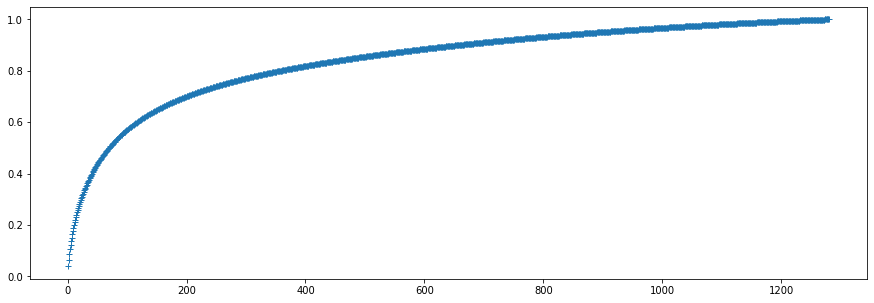

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(
    np.arange(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), "+", linewidth=2
)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)[200]

0.7008741

### PCA

In [ ]:
pca = PCA(n_components = 600)
pca.fit(learned_codes2)

PCA(n_components=600)

In [ ]:
learned_codes2 = pca.transform(learned_codes2)
test_codes2 = pca.transform(test_codes2)

In [ ]:
print(learned_codes2.shape)
print(test_codes2.shape)

(30922, 600)
(861, 600)


### Calculando distancia de coseno

In [ ]:
dist_batch_size = 600
n_batches = int(np.ceil(len(learned_codes2)/dist_batch_size))
dists_list2 = []
for i in tqdm(range(n_batches)):
    begin = i*dist_batch_size
    end = (i+1)*dist_batch_size
    dists2 = scipydistance.cdist(
        test_codes2, learned_codes2[begin:end], 'cosine')
    dists_list2.append(dists2)
dists2 = np.concatenate(dists_list2, axis=1)
print(dists2.shape)

100%|██████████| 52/52 [00:10<00:00,  4.95it/s]

(861, 30922)


In [ ]:
df2 = pd.DataFrame(
    dists2,
    index=testDirList,
    columns=trainDirList
)
df2

,image31272.jpg,image22531.jpg,image26718.jpg,image2318.jpg,image14263.jpg,image30008.jpg,image11339.jpg,image23511.jpg,image5635.jpg,image26069.jpg,...,image22776.jpg,image12240.jpg,image28933.jpg,image27422.jpg,image6103.jpg,image8474.jpg,image3409.jpg,image22472.jpg,image31551.jpg,image23234.jpg
image16040.jpg,0.971632,1.059629,0.895110,0.973368,0.985704,1.085742,1.077165,0.936939,1.023495,1.028191,...,0.999015,0.928975,1.156775,1.009822,0.987318,1.067451,0.971899,0.861209,1.079616,1.028287
image25535.jpg,0.969499,1.079293,1.013246,0.963038,0.939208,1.046396,0.940740,0.900951,1.010937,1.040333,...,0.829855,1.038353,1.039598,0.813369,1.106211,0.997895,1.010662,1.051053,1.068311,0.915262
image22392.jpg,1.027162,1.085469,1.002253,1.088595,0.927650,1.028175,1.081253,0.898048,0.930977,1.061192,...,0.925866,0.967218,0.975996,1.003596,0.981134,0.916357,1.091569,1.026611,1.023147,1.036306
image24783.jpg,1.020729,0.800930,1.108207,0.699093,1.118467,0.938531,0.945723,1.025998,1.054934,0.780642,...,1.001936,1.007982,0.885212,0.882108,1.137567,1.074685,0.774849,0.983918,0.999993,0.841193
image5004.jpg,1.022182,1.015682,0.912697,0.952329,0.870275,1.062051,1.053825,1.013249,1.083550,0.987865,...,0.956658,0.957842,1.089307,1.050300,1.070999,1.196199,0.840301,1.033921,0.836868,0.773930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image18683.jpg,0.847398,0.993602,1.054406,1.019743,0.884711,0.982288,1.003730,0.976703,0.982446,1.047928,...,0.957609,1.021885,1.066525,1.054209,0.978589,0.984027,1.064438,1.032281,1.037433,1.103641
image17518.jpg,0.997616,0.961101,1.116580,1.056564,1.014165,0.931636,1.001417,1.115800,0.972493,1.080972,...,1.115709,1.059155,1.056049,1.027789,0.803156,1.035596,1.081566,1.000753,1.023233,1.018511
image423.jpg,1.014315,1.037913,0.971813,1.000654,1.034292,1.018806,1.079613,0.945304,1.048997,0.966401,...,1.066839,1.108064,1.052601,1.002401,1.019323,1.022472,1.112765,0.989082,1.107136,1.003807
image13103.jpg,0.824393,1.061408,1.093412,1.060284,0.911049,1.090312,0.993827,0.954181,1.044672,1.124403,...,1.000634,1.104473,1.028653,1.084222,0.947300,0.621847,1.069984,1.062434,0.956627,1.111978


### MAP@100

#### Submit 4.1

In [ ]:
top100_list = []
for test_file_name, row in df2.iterrows():
    top100 = row.sort_values()[:100]
    top100 = [v[6:].split('.')[0] for v in top100.index.values]
    top100 = ' '.join(top100)
    top100_list.append([
        test_file_name[6:].split('.')[0],
        top100
    ])
top100_df = pd.DataFrame(top100_list, columns=['Id', 'Expected'])
top100_df

,Id,Expected
0,16040,21259 12848 14206 23252 19725 28965 12890 2293...
1,25535,5298 23454 8832 31447 25799 29021 23425 158 18...
2,22392,23653 24833 15939 15584 28048 6749 23400 9319 ...
3,24783,4385 23516 7288 20654 15880 30196 16690 12004 ...
4,5004,11358 7528 19340 17808 10843 4748 31559 10255 ...
...,...,...
856,18683,4053 18862 9812 23653 31704 25153 29015 13904 ...
857,17518,21060 5213 629 3471 12986 1966 30796 23991 179...
858,423,16507 27395 23673 25890 12646 5473 26316 13929...
859,13103,5131 19861 22639 29349 31077 7714 22329 18087 ...


In [ ]:
top100_df.to_csv('submission.cosine.mean.pca600.100.full.csv', index=False)

**Score = 0.06477**

### MAP@50

#### Submit 4.2

In [ ]:
top50_list = []
for test_file_name, row in df2.iterrows():
    top50 = row.sort_values()[:50]
    top50 = [v[6:].split('.')[0] for v in top50.index.values]
    top50 = ' '.join(top50)
    top50_list.append([
        test_file_name[6:].split('.')[0],
        top50
    ])
top50_df = pd.DataFrame(top50_list, columns=['Id', 'Expected'])
top50_df

,Id,Expected
0,16040,21259 12848 14206 23252 19725 28965 12890 2293...
1,25535,5298 23454 8832 31447 25799 29021 23425 158 18...
2,22392,23653 24833 15939 15584 28048 6749 23400 9319 ...
3,24783,4385 23516 7288 20654 15880 30196 16690 12004 ...
4,5004,11358 7528 19340 17808 10843 4748 31559 10255 ...
...,...,...
856,18683,4053 18862 9812 23653 31704 25153 29015 13904 ...
857,17518,21060 5213 629 3471 12986 1966 30796 23991 179...
858,423,16507 27395 23673 25890 12646 5473 26316 13929...
859,13103,5131 19861 22639 29349 31077 7714 22329 18087 ...


In [ ]:
top50_df.to_csv('submission.cosine.mean.pca600.50.full.csv', index=False)

**Score = 0.00006**

![picture](https://drive.google.com/uc?export=view&id=12Pbh48wUIS00yRrPfi3JUZ9PwRta7oCE)

![picture](https://drive.google.com/uc?export=view&id=17JyZ5VD0OdhFA400xfvPWp0W2ZTtnJd4)
![picture](https://drive.google.com/uc?export=view&id=1OV64s4DAQrfp9agUfmEddBKf2Anoh25o)



---


![picture](https://drive.google.com/uc?export=view&id=1Uv9CHhPaYDnVNVJCzetiB1IRTA209Zhs)

![picture](https://drive.google.com/uc?export=view&id=1BzwOiQI1aR_pmZtk6d1nNn1sZFEm2vcR)
![picture](https://drive.google.com/uc?export=view&id=1XlAoEHjYKH1x9OY6akqMNY4EeNc7ssE8)
